<a href="https://colab.research.google.com/github/toyeshg/Expression-Detection/blob/main/Expression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install py-feat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from feat.detector import Detector

detector = Detector(verbose=True)


detector

Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/Oct30FinalXGB_AU1.ubj
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/upper_face_pcaSet.pkl
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/lower_face_pcaSet.pkl
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/full_face_pcaSet.pkl
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/Oct30FinalXGB_AU2.ubj
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/upper_face_pcaSet.pkl
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/lo

feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

Now, just a way to show how to change models

In [ ]:
detector.change_model(face_model="MTCNN")
detector

Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/onet.pt
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/pnet.pt
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/rnet.pt
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/Oct30FinalXGB_AU1.ubj
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/upper_face_pcaSet.pkl
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/lower_face_pcaSet.pkl
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/full_face_pcaSet.pkl
Using downloaded and verified file: /usr/local/lib/python3.9/dist-packages/feat/resources/Oct30FinalXGB_AU2.ubj
Using downloaded and ver

feat.detector.Detector(face_model=mtcnn, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

Now, we read the image.
This loads the image.
Loads the face cascade into memory so it's ready for use.

*The cascade is just an XML file that contains the data to detect faces:*

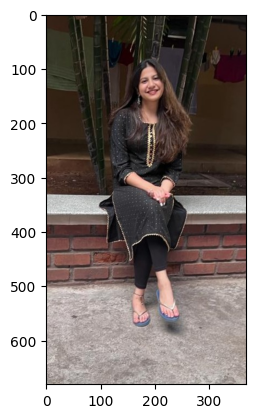

In [ ]:
import cv2
import matplotlib.pyplot as plt
img= cv2.imread('image.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

Import the image *'image.jpg'* and pass it throught the Detector denoted as *'detector'* using the function `.detect_image()` and save the data in *'faces'*.
This is the main workhorse method that will perform face, landmark, au, and emotion detection using the loaded models. This returns a *fex* data instance

We save our detection directly to a file by specifying an `outputFname`when using `.detect_image`.

In [ ]:
faces = detector.detect_image('image.jpg', outputFname = "output.csv")

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, 

**Show results**

In [ ]:
faces

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,171.108597,98.271217,45.01825,62.155846,0.999896,169.703194,170.444359,171.635469,173.604257,176.850988,...,0.378152,0.006437,0.003702,0.000161,0.965872,0.009774,0.000497,0.013557,image.jpg,0


Now let's see the opencv method to display the box on the detected face.

we import cv2 but Google colab can't work with it directly so we import cv2_imshow from google.colab.patches.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

With this we then read the image using imread  and then draw the rectangle based on the coordinates of the face we got using detector.

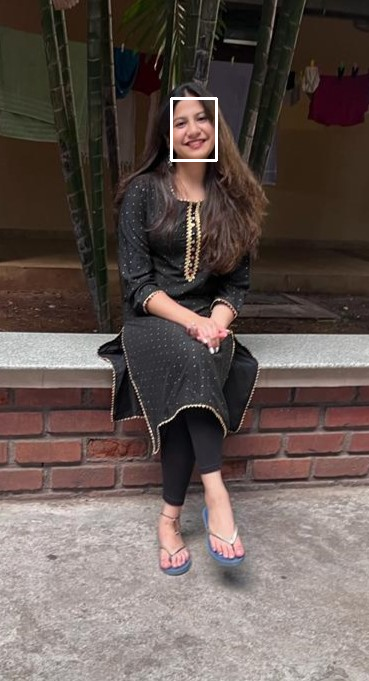

In [ ]:
img = cv2.imread('image.jpg')

cv2.rectangle(img, pt1=(int(faces.FaceRectX), int(faces.FaceRectY)), pt2=(int(faces.FaceRectX+faces.FaceRectWidth), int(faces.FaceRectY+faces.FaceRectHeight)), color=(255,255,255), thickness=2)
cv2_imshow(img)

Now back to Py-Feat

we have got fex data from the detector so our first step now is to import libraries which could help us read and process that data.

In [ ]:
from feat.data import Fex
import pandas as pd

fex= Fex()
isinstance(fex, pd.DataFrame)

True

In [ ]:
detector= Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='svm',
    emotion_model="resmasknet",
    facepose_model="img2pose"
)
detector

feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=svm, emotion_model=resmasknet, facepose_model=img2pose)

In [ ]:
faces.facebox

/usr/local/lib/python3.9/dist-packages/feat/data.py:616: DeprecationWarning: Fex.facebox has been renamed to Fex.faceboxes
  warnings.warn(


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore
0,171.108597,98.271217,45.01825,62.155846,0.999896


In [ ]:
faces.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.259327,0.496113,0.562111,0.314307,0.86493,1.0,0.533528,0.955731,0.49887,0.881672,0.449353,0.129378,0.548605,1.0,0.149369,0.434566,0.880195,0.293477,0.062315,0.378152


In [ ]:
faces.emotions

,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0.006437,0.003702,0.000161,0.965872,0.009774,0.000497,0.013557


In [ ]:
faces.facepose # in degrees

/usr/local/lib/python3.9/dist-packages/feat/data.py:505: DeprecationWarning: Fex.facepose has now been renamed to Fex.poses
  warnings.warn(


,Pitch,Roll,Yaw
0,-2.428883,-15.880178,0.861051


In [ ]:
faces.to_csv("output.csv", index=False)

In [ ]:
from feat.utils.io import read_feat

input_predictions = read_feat("output.csv")

#Show results
input_predictions

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,171.108597,98.271217,45.01825,62.155846,0.999896,169.703194,170.444359,171.635469,173.604257,176.850988,...,0.378153,0.006437,0.003702,0.000161,0.965872,0.009774,0.000497,0.013557,image.jpg,0


**Loading detection results from a saved file**

we can load this output using `read_feat()` function. It behaves just like `pd.read_csv` from Pandas, but returns a Fex data class instead of a DataFrame

**Visualizing Detected Results**

`.plot_detections()` method to generate summary figure of detected faces, actions and emotions.

Returns a list of matplotlib figures

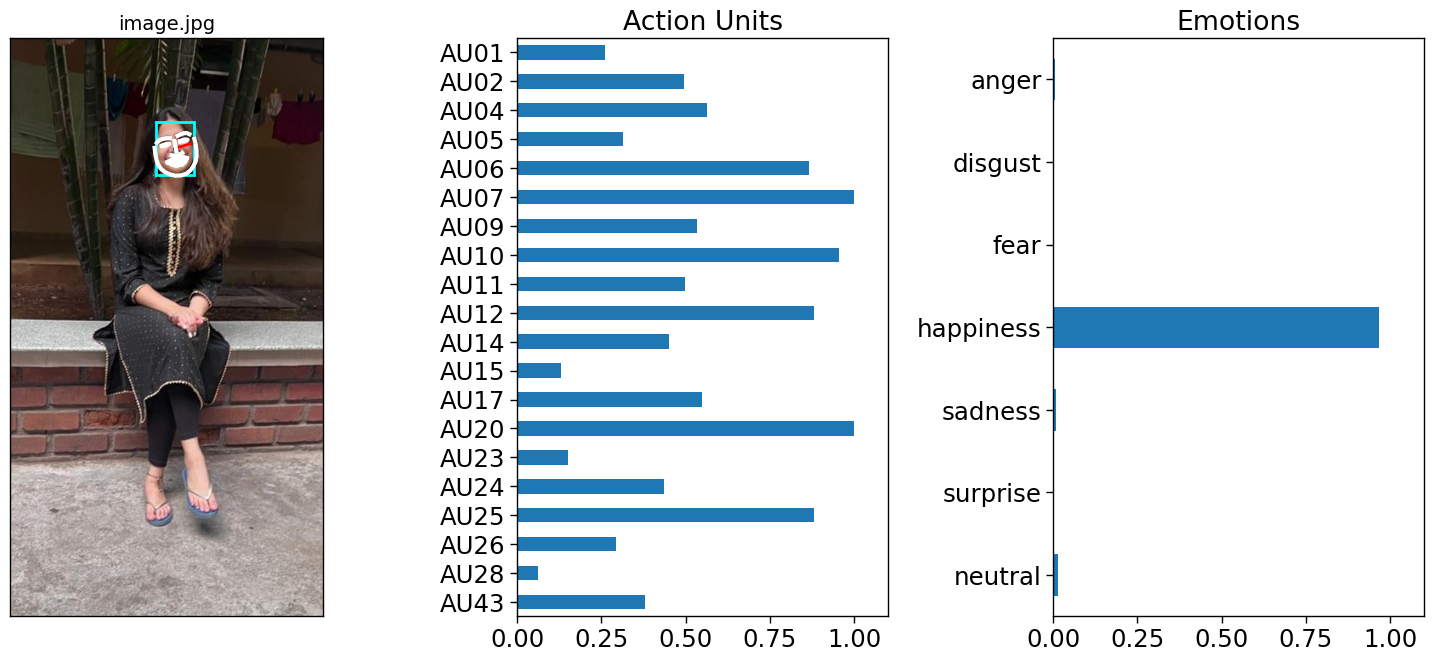

In [ ]:
fig=faces.plot_detections(poses=True)

now this has overlay lines on top of the input image.

We could also do this using Py-feat's standardized AU landmark model.
It takes the detected AUs and projects them onto a template face
This can be done....

100%|██████████| 20498112/20498112 [00:00<00:00, 49516564.10it/s]


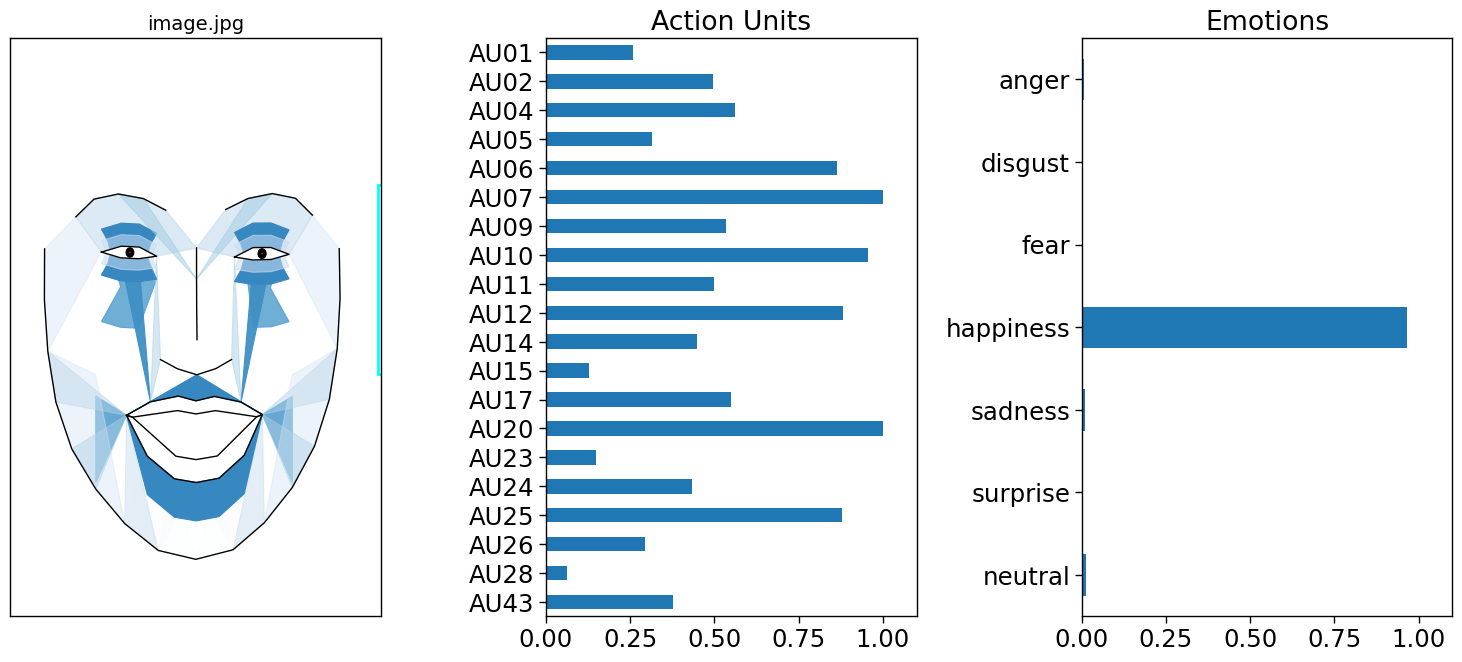

In [ ]:
fig=faces.plot_detections(faces='aus', muscles= True)